# 라이브러리 로드

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [96]:
train = pd.read_csv("data/train.csv", index_col="id")
print(train.shape)
train.head(2)

(3000, 22)


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [97]:
test = pd.read_csv("data/test.csv", index_col="id")
print(test.shape)
test.head(2)

(4398, 21)


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [98]:
# 예측해야할 컬럼
set(train.columns) - set(test.columns)

{'revenue'}

In [99]:
sub = pd.read_csv("data/sample_submission.csv")
sub.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


---

# 전처리

### 결측치 확인

In [100]:
# train
train.isnull().sum()

belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [101]:
# test
test.isnull().sum()

belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

#### belongs_to_collection, homepage의 경우는 데이터셋의 대부분이 결측치이기 때문에 삭제

In [102]:
train = train.drop(columns=["belongs_to_collection", "homepage"])
test = test.drop(columns=["belongs_to_collection", "homepage"])

In [103]:
display(train.head(2))
display(test.head(2))

,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,
1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,
3001,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


### json 형태 데이터
```
- 삭제할 컬럼의 경우 마지막에 한번에 진행
1) genres => 개수
2) production_companies => 개수
3) production_countries => 개수
4) spoken_lanuages => 개수
5) Keywords => 삭제
6) cast => 삭제
7) crew => 삭제
```

In [104]:
# genres, production_companies, pspoken_languages => 개수로 표현

# ast.literal_eval : 문자열 속 표현식을 인식


# 예시
import ast

print(train["genres"][2])
len(ast.literal_eval(train["genres"][2]))

[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]


4

In [105]:
# 결측치를 모두 0으로 채움
train["genres"] = train["genres"].fillna(0)
test["genres"] = test["genres"].fillna(0)

train["production_companies"] = train["production_companies"].fillna(0)
test["production_companies"] = test["production_companies"].fillna(0)

train["production_countries"] = train["production_countries"].fillna(0)
test["production_countries"] = test["production_countries"].fillna(0)

train["spoken_languages"] = train["spoken_languages"].fillna(0)
test["spoken_languages"] = test["spoken_languages"].fillna(0)

In [106]:
# 개수 변환
# 결측치를 0으로 채웠기 때문에 조건문을 통해 0이 아닌 데이터만 지정

train["genres"] = train["genres"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)
test["genres"] = test["genres"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)

train["production_companies"] = train["production_companies"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)
test["production_companies"] = test["production_companies"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)

train["production_countries"] = train["production_countries"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)
test["production_countries"] = test["production_countries"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)

train["spoken_languages"] = train["spoken_languages"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)
test["spoken_languages"] = test["spoken_languages"].map(lambda x: len(ast.literal_eval(x)) if x != 0 else 0)

In [107]:
# 결과 확인
train[["genres", "production_companies", "production_countries", "spoken_languages"]].head()

,genres,production_companies,production_countries,spoken_languages
id,,,,
1,1,3,1,1
2,4,1,1,1
3,1,3,1,1
4,2,0,1,2
5,2,0,1,1


### 날짜 구분
- release_date (월/일/연도) => 결측치 (test)

In [108]:
# 결측치 확인
train["release_date"].isnull().sum(), test["release_date"].isnull().sum()

(0, 1)

In [109]:
# datetime 형식으로 변환
train["release_date"] = pd.to_datetime(train["release_date"])
test["release_date"] = pd.to_datetime(test["release_date"])

In [110]:
# dt accessors 활용
train["release_year"] = train["release_date"].dt.year
train["release_month"] = train["release_date"].dt.month
train["release_day"] = train["release_date"].dt.day

test["release_year"] = test["release_date"].dt.year
test["release_month"] = test["release_date"].dt.month
test["release_day"] = test["release_date"].dt.day

In [111]:
# 결과 확인
train[["release_date", "release_year", "release_month", "release_day"]]

,release_date,release_year,release_month,release_day
id,,,,
1,2015-02-20,2015,2,20
2,2004-08-06,2004,8,6
3,2014-10-10,2014,10,10
4,2012-03-09,2012,3,9
5,2009-02-05,2009,2,5
...,...,...,...,...
2996,1994-04-22,1994,4,22
2997,2013-03-28,2013,3,28
2998,1996-10-11,1996,10,11


In [112]:
# 결측치 0으로 채우기
test.release_year = test.release_year.fillna(0)
test.release_month = test.release_month.fillna(0)
test.release_day = test.release_day.fillna(0)

In [215]:
# 확인
test.release_year.isnull().sum(), test.release_month.isnull().sum(), test.release_day.isnull().sum()

(0, 0, 0)

In [114]:
# 기존 컬럼 삭제
train = train.drop(columns="release_date")
test = test.drop(columns="release_date")

### Encoding

```
<Binary Encoding>
- status => 결측치 (test)

<Ordinal Encoding>
- original_lanuage
```

#### Binary Encoding

In [115]:
display("<train>", train.status.value_counts())
display("<test>", test.status.value_counts())

'<train>'

Released    2996
Rumored        4
Name: status, dtype: int64

'<test>'

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [116]:
# Post Production : 1, Released : 2, Rumored : 3로 변경
train["status"] = train["status"].replace(["Released", "Rumored"], [2, 3])
test["status"] = test["status"].replace(["Post Production", "Released", "Rumored"], [1, 2, 3])

In [117]:
# 결측치 0으로 채우기
test["status"] = test["status"].fillna(0)

In [118]:
# 결과 빈도수 확인
display("<train>", train.status.value_counts())
display("<test>", test.status.value_counts())

'<train>'

2    2996
3       4
Name: status, dtype: int64

'<test>'

2.0    4389
1.0       5
3.0       2
0.0       2
Name: status, dtype: int64

#### Ordinal Encoding

In [119]:
# 상위 6개까지는 train과 test 데이터 동일
train_ol = train.original_language.value_counts()
display("<train>", train_ol.nlargest(6))

test_ol = test.original_language.value_counts()
display("<test>", test_ol.nlargest(6))

'<train>'

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
Name: original_language, dtype: int64

'<test>'

en    3776
fr     121
hi      76
ru      62
ja      53
es      52
Name: original_language, dtype: int64

In [120]:
# 상위 6개를 제외한 데이터는 기타 처리
train["original_language"] = train["original_language"].map(lambda x: x if x in train_ol.nlargest(6) else "etc")
test["original_language"] = test["original_language"].map(lambda x: x if x in train_ol.nlargest(6) else "etc")

In [121]:
# 기타 처리 결과 확인
display("<train>", train.original_language.value_counts())
display("<test>", test.original_language.value_counts())

'<train>'

en     2575
etc     178
fr       78
ru       47
es       43
hi       42
ja       37
Name: original_language, dtype: int64

'<test>'

en     3776
etc     258
fr      121
hi       76
ru       62
ja       53
es       52
Name: original_language, dtype: int64

In [122]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()

encoder.fit(train["original_language"])
train["original_language"] = encoder.transform(train["original_language"])
test["original_language"] = encoder.transform(test["original_language"])

In [123]:
# encoding 결과 확인
display("<train>", train.original_language.value_counts())
display("<test>", test.original_language.value_counts())

'<train>'

1    2575
3     178
4      78
6      47
5      43
2      42
7      37
Name: original_language, dtype: int64

'<test>'

1    3776
3     258
4     121
2      76
6      62
7      53
5      52
Name: original_language, dtype: int64

### Scaling
```
1) budget
2) popularity
3) runtime => 결측치 (train, test)
```

In [124]:
# 결측치 0으로 채우기
train.runtime = train.runtime.fillna(0)
test.runtime = test.runtime.fillna(0)

In [125]:
# 확인
train.runtime.isnull().sum(), test.runtime.isnull().sum()

(0, 0)

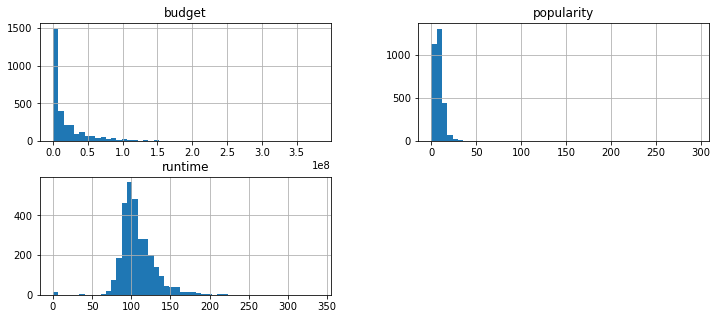

In [126]:
train[["budget", "popularity", "runtime"]].hist(figsize=(12, 5), bins=50);

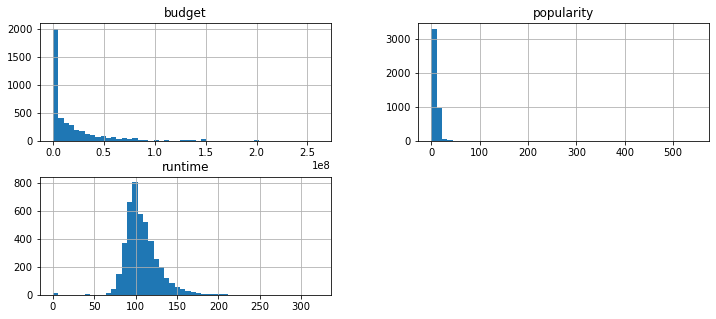

In [127]:
test[["budget", "popularity", "runtime"]].hist(figsize=(12, 5), bins=50);

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train[["budget", "popularity", "runtime"]])
train[["budget", "popularity", "runtime"]] = scaler.transform(train[["budget", "popularity", "runtime"]])
test[["budget", "popularity", "runtime"]] = scaler.transform(test[["budget", "popularity", "runtime"]])

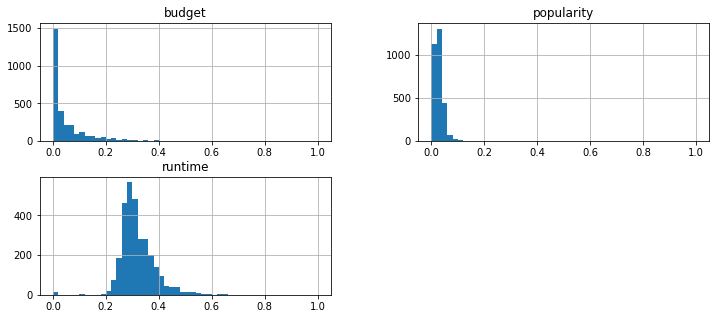

In [129]:
train[["budget", "popularity", "runtime"]].hist(figsize=(12, 5), bins=50);

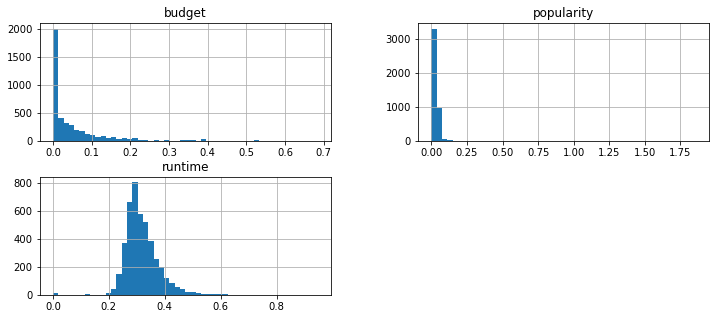

In [130]:
test[["budget", "popularity", "runtime"]].hist(figsize=(12, 5), bins=50);

### 사용하지 않을 피처 삭제
```
- 페이지 주소 | 수치형으로 인코딩하기엔 고유값이 많음 | 필요없을 것 같은 컬럼
1) Keywords
2) cast
3) crew
4) imdb_id
5) original_title
6) overview
7) poster_path
8) tagline
9) title
```

In [131]:
col = ["Keywords", "cast", "crew", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title"]

In [132]:
train = train.drop(columns=col)
test = test.drop(columns=col)

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   float64
 1   genres                3000 non-null   int64  
 2   original_language     3000 non-null   int32  
 3   popularity            3000 non-null   float64
 4   production_companies  3000 non-null   int64  
 5   production_countries  3000 non-null   int64  
 6   runtime               3000 non-null   float64
 7   spoken_languages      3000 non-null   int64  
 8   status                3000 non-null   int64  
 9   revenue               3000 non-null   int64  
 10  release_year          3000 non-null   int64  
 11  release_month         3000 non-null   int64  
 12  release_day           3000 non-null   int64  
dtypes: float64(3), int32(1), int64(9)
memory usage: 380.9 KB


In [216]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 3001 to 7398
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4398 non-null   float64
 1   genres                4398 non-null   int64  
 2   original_language     4398 non-null   int32  
 3   popularity            4398 non-null   float64
 4   production_companies  4398 non-null   int64  
 5   production_countries  4398 non-null   int64  
 6   runtime               4398 non-null   float64
 7   spoken_languages      4398 non-null   int64  
 8   status                4398 non-null   float64
 9   release_year          4398 non-null   float64
 10  release_month         4398 non-null   float64
 11  release_day           4398 non-null   float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 429.5 KB


### log
- revenue

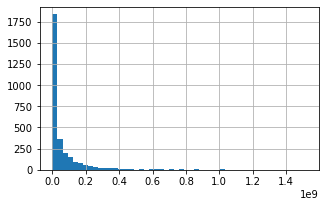

In [134]:
train.revenue.hist(bins=50, figsize=(5, 3));

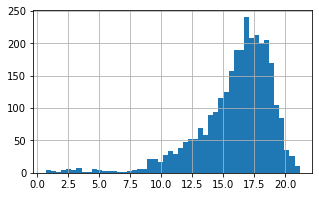

In [135]:
np.log1p(train["revenue"]).hist(bins=50, figsize=(5, 3));

In [136]:
train["revenue"] = np.log1p(train["revenue"])
train["revenue"]

id
1       16.326300
2       18.370959
3       16.387512
4       16.588099
5       15.182615
          ...    
2996    14.283442
2997    12.103990
2998    18.309266
2999    18.962792
3000    18.223292
Name: revenue, Length: 3000, dtype: float64

# ML

### 데이터셋 만들기

In [137]:
# 사용할 컬럼
label_name = "revenue"
feature_names = train.columns.to_list()
feature_names.remove(label_name)

In [138]:
# 학습 데이터
X_train = train[feature_names]
print(X_train.shape)
X_train.head(2)

(3000, 12)


,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,release_year,release_month,release_day
id,,,,,,,,,,,,
1,0.036842,1,1,0.022340,3,1,0.275148,1,2,2015,2,20
2,0.105263,4,1,0.028025,1,1,0.334320,1,2,2004,8,6


In [139]:
# 학습 데이터 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head(2)

(3000,)


id
1    16.326300
2    18.370959
Name: revenue, dtype: float64

In [140]:
# 예측 데이터
X_test = test[feature_names]
print(X_test.shape)
X_test.head(2)

(4398, 12)


,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,release_year,release_month,release_day
id,,,,,,,,,,,,
3001,0.000000,4,7,0.013085,0,2,0.266272,2,2.0,2007.0,7.0,14.0
3002,0.000232,2,1,0.012094,1,1,0.192308,1,2.0,2058.0,5.0,19.0


---

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   float64
 1   genres                3000 non-null   int64  
 2   original_language     3000 non-null   int32  
 3   popularity            3000 non-null   float64
 4   production_companies  3000 non-null   int64  
 5   production_countries  3000 non-null   int64  
 6   runtime               3000 non-null   float64
 7   spoken_languages      3000 non-null   int64  
 8   status                3000 non-null   int64  
 9   revenue               3000 non-null   float64
 10  release_year          3000 non-null   int64  
 11  release_month         3000 non-null   int64  
 12  release_day           3000 non-null   int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 380.9 KB


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 3001 to 7398
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4398 non-null   float64
 1   genres                4398 non-null   int64  
 2   original_language     4398 non-null   int32  
 3   popularity            4398 non-null   float64
 4   production_companies  4398 non-null   int64  
 5   production_countries  4398 non-null   int64  
 6   runtime               4398 non-null   float64
 7   spoken_languages      4398 non-null   int64  
 8   status                4398 non-null   float64
 9   release_year          4398 non-null   float64
 10  release_month         4398 non-null   float64
 11  release_day           4398 non-null   float64
dtypes: float64(7), int32(1), int64(4)
memory usage: 429.5 KB


---

### 모델

#### Linear regression

In [143]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
y_predict = lr.predict(X_test)
y_predict[:5]

array([13.42515985, 13.3284782 , 15.48756047, 15.18640182, 14.46041534])

In [144]:
sub["revenue"] = np.expm1(y_predict)
sub.head(2)

,id,revenue
0,3001,676818.465136
1,3002,614446.151947


In [145]:
file_name = "data/LinearRegression.csv"

In [146]:
sub.to_csv(file_name, index=False)
pd.read_csv(file_name)

,id,revenue
0,3001,6.768185e+05
1,3002,6.144462e+05
2,3003,5.323067e+06
3,3004,3.938859e+06
4,3005,1.905805e+06
...,...,...
4393,7394,3.727586e+07
4394,7395,8.974273e+06
4395,7396,8.887782e+06
4396,7397,4.093614e+06


#### RandomForestRegressor

In [147]:
# 모델 불러오기
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

# 학습 & 예측
y_predict = rfr.fit(X_train, y_train).predict(X_test)
y_predict[:5]

array([13.79611581, 13.36466841, 15.57603482, 15.12591015, 12.90059505])

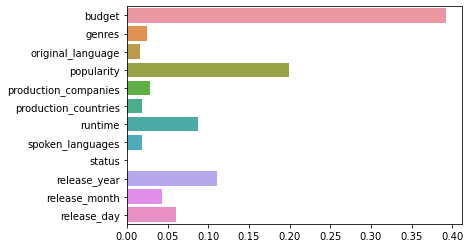

In [148]:
sns.barplot(x=rfr.feature_importances_, y=rfr.feature_names_in_);

In [149]:
sub["revenue"] = np.expm1(y_predict)
sub.head(2)

,id,revenue
0,3001,980791.122653
1,3002,637090.397709


In [150]:
file_name = "data/RandomForestRegressor.csv"
sub.to_csv(file_name, index=False)
pd.read_csv(file_name)

,id,revenue
0,3001,9.807911e+05
1,3002,6.370904e+05
2,3003,5.815484e+06
3,3004,3.707654e+06
4,3005,4.005495e+05
...,...,...
4393,7394,1.047111e+08
4394,7395,2.622728e+07
4395,7396,4.197314e+07
4396,7397,5.249290e+06


#### RandomForestRegressor - RandomizedSearchCV

In [180]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

In [187]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth":np.random.randint(3, 20, 10),
                       "max_features": np.random.uniform(0, 1, 50)}

reg = RandomizedSearchCV(model, 
                         param_distributions=param_distributions, 
                         scoring="neg_root_mean_squared_error",
                         n_iter=10, cv=5,
                         verbose=2, random_state=42)

reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=11, max_features=0.6454863655229995; total time=   0.3s
[CV] END ......max_depth=11, max_features=0.6454863655229995; total time=   0.3s
[CV] END ......max_depth=11, max_features=0.6454863655229995; total time=   0.3s
[CV] END ......max_depth=11, max_features=0.6454863655229995; total time=   0.3s
[CV] END ......max_depth=11, max_features=0.6454863655229995; total time=   0.3s
[CV] END ........max_depth=12, max_features=0.36224684023208; total time=   0.2s
[CV] END ........max_depth=12, max_features=0.36224684023208; total time=   0.2s
[CV] END ........max_depth=12, max_features=0.36224684023208; total time=   0.2s
[CV] END ........max_depth=12, max_features=0.36224684023208; total time=   0.2s
[CV] END ........max_depth=12, max_features=0.36224684023208; total time=   0.2s
[CV] END .....max_depth=11, max_features=0.46229887464604524; total time=   0.2s
[CV] END .....max_depth=11, max_features=0.46229

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([18, 12, 11, 18, 18, 10, 13, 11,  3, 14]),
                                        'max_features': array([0.30926316, 0.85652934, 0.33276067, 0.09591557, 0.78004731,
       0.09050316, 0.9956672 , 0.11913451, 0.51632829, 0.71343963,
       0.86855148, 0.64548637, 0.0327072 , 0.11893461, 0.44696798,
       0.33034928, 0.56683778, 0.47048841, 0.8...
       0.07440805, 0.87992434, 0.92227809, 0.36224684, 0.46229887,
       0.44247104, 0.52882208, 0.03034275, 0.86803848, 0.9937213 ,
       0.17564721, 0.43751624, 0.81839535, 0.31257366, 0.78701765,
       0.30676916, 0.19918532, 0.86914223, 0.2794025 , 0.45883269,
       0.96237335, 0.38400512, 0.3635401 , 0.74620089, 0.77801967,
       0.29963301, 0.35198175, 0.79864338, 0.82075372, 0.35739053])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [188]:
rmsle = abs(reg.best_score_)
rmsle

2.1797491848367327

In [189]:
best_model = reg.best_estimator_

y_predict = best_model.fit(X_train, y_train).predict(X_test)
y_predict

array([13.82077541, 13.09478951, 15.42988223, ..., 17.51658792,
       15.57323882, 13.78261317])

In [190]:
sub["revenue"] = np.expm1(y_predict)
sub.head(2)

,id,revenue
0,3001,1.005278e+06
1,3002,4.864004e+05


In [191]:
file_name = "data/RandomForestRegressor_randomsearch.csv"
sub.to_csv(file_name, index=False)
pd.read_csv(file_name)

,id,revenue
0,3001,1.005278e+06
1,3002,4.864004e+05
2,3003,5.024729e+06
3,3004,8.480273e+06
4,3005,2.831350e+05
...,...,...
4393,7394,6.435034e+07
4394,7395,2.674454e+07
4395,7396,4.049090e+07
4396,7397,5.799247e+06


#### Ridge

In [152]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)

# 학습
ridge.fit(X_train, y_train)

# 예측
y_predict = ridge.predict(X_test)
y_predict[:5]

array([13.41904383, 13.38866493, 15.50593209, 15.17194341, 14.47662099])

In [153]:
sub["revenue"] = np.expm1(y_predict)
sub.head(2)

,id,revenue
0,3001,672691.656016
1,3002,652563.284971


In [156]:
file_name = "data/Ridge.csv"
sub.to_csv(file_name, index=False)
pd.read_csv(file_name)

,id,revenue
0,3001,6.726917e+05
1,3002,6.525633e+05
2,3003,5.421765e+06
3,3004,3.882319e+06
4,3005,1.936941e+06
...,...,...
4393,7394,3.731667e+07
4394,7395,9.271512e+06
4395,7396,8.505199e+06
4396,7397,3.905508e+06


#### CatBoost

In [211]:
from catboost import CatBoostRegressor

clf = CatBoostRegressor(iterations=1000)

# 학습
clf.fit(X_train, y_train, verbose=100)

Learning rate set to 0.048704
0:	learn: 2.9996960	total: 1.31ms	remaining: 1.31s
100:	learn: 2.0107250	total: 115ms	remaining: 1.02s
200:	learn: 1.8477985	total: 228ms	remaining: 906ms
300:	learn: 1.7235175	total: 346ms	remaining: 803ms
400:	learn: 1.6316832	total: 473ms	remaining: 706ms
500:	learn: 1.5418958	total: 593ms	remaining: 591ms
600:	learn: 1.4595756	total: 717ms	remaining: 476ms
700:	learn: 1.3892637	total: 836ms	remaining: 357ms
800:	learn: 1.3243817	total: 966ms	remaining: 240ms
900:	learn: 1.2661352	total: 1.1s	remaining: 121ms
999:	learn: 1.2160123	total: 1.25s	remaining: 0us


In [212]:
cat_pred = clf.predict(X_test)
cat_pred

array([15.29130827, 15.03625561, 15.65089967, ..., 17.72885218,
       16.0540288 , 13.17906551])

In [213]:
sub["revenue"] = np.expm1(cat_pred)
sub.head(2)

,id,revenue
0,3001,4.374523e+06
1,3002,3.389711e+06


In [214]:
file_name = "data/catboost.csv"
sub.to_csv(file_name, index=False)
pd.read_csv(file_name)

,id,revenue
0,3001,4.374523e+06
1,3002,3.389711e+06
2,3003,6.267571e+06
3,3004,5.151243e+06
4,3005,2.751463e+05
...,...,...
4393,7394,8.959009e+07
4394,7395,2.201667e+07
4395,7396,5.006597e+07
4396,7397,9.379422e+06
